In [2]:
import numpy as np 
import pandas as pd 
import warnings

In [3]:
warnings.filterwarnings('ignore')
column_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("ml-100k/ml-100k/u.data", sep="\t", names=column_names)
df.head()


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
movie_data=pd.read_csv('ml-100k/ml-100k/u.item',sep='\|',header=None)
movie_data=movie_data[[0,1]]
movie_data.columns=['item_id','title']
movie_data.head()


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df=pd.merge(df,movie_data,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)


title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [9]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [10]:
ratings = df.groupby('title').mean()['rating']
ratings.columns = ['title', 'rating']
ratings.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [11]:
total_reviews = df.groupby('title').count()['rating']
total_reviews.columns = ['title', 'num of ratings']
total_reviews

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [12]:
ratings=pd.merge(ratings, total_reviews,on='title')
ratings

,rating_x,rating_y
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [13]:
ratings.columns = ['rating', 'num of reviews']
ratings.head()

,rating,num of reviews
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [14]:
ratings.sort_values( ascending=False, by='rating')

,rating,num of reviews
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


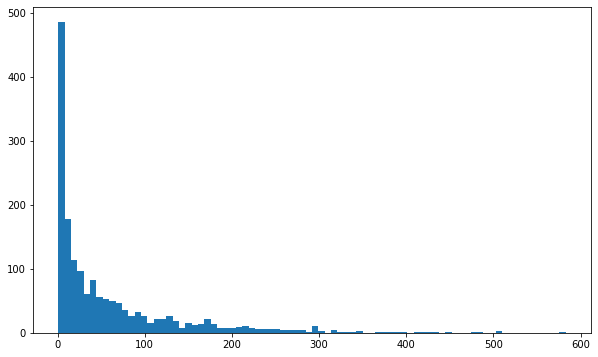

In [15]:
plt.figure(figsize= (10, 6))
plt.hist(ratings['num of reviews'], bins=80)
plt.show()

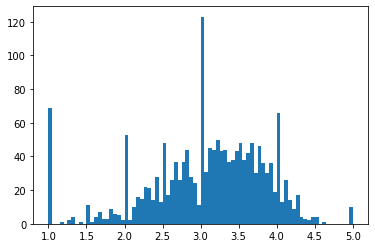

In [16]:
plt.hist(ratings['rating'], bins=80)
plt.show()

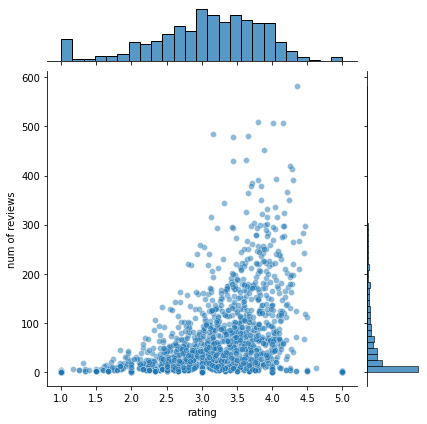

In [17]:
sns.jointplot(x = 'rating', y = 'num of reviews', data = ratings, alpha = 0.5)

In [18]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def predictions_movie(movie_name):
    movie_ratings = moviemat[movie_name]
    similar = moviemat.corrwith(movie_ratings)
    corr_movie = pd.DataFrame(similar, columns=['correlation'])
    corr_movie.dropna(inplace = True)
    corr_movie = corr_movie.join(ratings['num of reviews'])
    predictions = corr_movie[corr_movie['num of reviews'] > 100].sort_values(by ='correlation', ascending = False)
    return predictions




In [22]:
predictions = predictions_movie('Star Wars (1977)')
predictions.head

<bound method NDFrame.head of                                                     correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.747981   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   
...                                                         ...   
Edge, The (1997)                                      -0.127167   
As Good As It Gets (1997)                             -0.130466   
Crash (1996)                                          -0.148507   
G.I. Jane (1997)                                      -0.176734   
First Wives Club, The (1996)                          -0.194496   

                                                    num of reviews  
title                        